# Proyek Analisis Data: Air Quality Dataset
- Kelompok : IF7- Numpy
- Anggota : </br>
10122244 - MOCHAMMAD SYAHRUL ALMUGNI YUSUP</br>
10122256 - MUHAMMAD FARID NURRAHMAN</br>
10122265 - MUHAMMAD PRADIPTA WASKITHA</br>
10122269 - ERWIN HAFIZ TRIADI</br>
10122273 - WIN TERMULO NOVA</br>
10122510 - FIKKRY IHZA FACHREZI

- (10122256) Bagaimana perbandingan tingkat polusi udara perharinya?
- (10122269) Bagaimana tren kualitas udara berdasarkan PM2.5, PM10, SO2, NO2, CO, dan O3 selama periode waktu tertentu?
- (10122244) Apakah ada korelasi antara suhu (TEMP), tekanan udara (PRES), kecepatan angin (WSPM), dan kualitas udara?
- (10122510) Apakah ada perbedaan dalam tingkat polusi udara antara bulan-bulan tertentu atau jam-jam tertentu dalam sehari?
- (10122273) Bagaimana pola musiman curah hujan memengaruhi kualitas udara?
- (10122256) Apakah ada korelasi antara arah angin (wd) dan tingkat polusi udara?
- (10122265) Bisakah kita memprediksi tingkat PM2.5 atau parameter Suhu (Temprature) serta kelembapan?
- (10122265) Apakah tingkat SO2, NO2, dan O3 lebih tinggi pada hari dengan suhu tinggi atau rendah?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Data Wrangling

### Gathering Data

In [3]:
data1 = pd.read_csv('https://raw.githubusercontent.com/MFaridN/UAS_PDSD/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data1

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


### Assessing Data

In [4]:
data1.head()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Cleaning Data

In [5]:
missing_format = ['N.A','na','n.a','?','-',' ','/' ]
data1.isna().any()
data1.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
data = data1
data.fillna(method='ffill', inplace=True)  # Menggunakan nilai sebelumnya (forward fill)
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [7]:
data1.fillna(method='ffill', inplace=True)  # Menggunakan nilai sebelumnya (forward fill)

# Cari kolom-kolom yang mengandung nilai non-numerik
non_numeric_columns = data1.select_dtypes(exclude=['number']).columns

# Drop kolom-kolom non-numerik dari DataFrame
data1 = data1.drop(columns=non_numeric_columns)
data1

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2.4
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,0.9
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,1.1
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,1.2


## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
data1.corr()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.026166,-0.083234,-0.248902,-0.088687,0.072583,0.065450,-0.107993,0.237346,-0.133362,0.002161,0.095806
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.030727,-0.077585,-0.187411,-0.117000,0.054456,0.092587,-0.137595,0.233190,-0.197556,-0.001095,0.133673
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.019889,-0.019528,-0.232581,0.121638,0.069088,-0.115266,0.131154,-0.006500,0.273844,0.013523,-0.161306
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.007053,0.037139,-0.009325,0.011501,-0.018551,0.000053,0.014283,0.022759,0.023397,-0.002517,-0.016620
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.011307,0.020968,0.001265,-0.045572,-0.045128,0.293940,0.141363,-0.037706,-0.013186,0.011522,0.155468
PM2.5,-0.026166,-3.072738e-02,1.988923e-02,7.052790e-03,-1.130703e-02,1.000000,0.872035,0.474893,0.675116,0.775057,-0.159296,-0.126029,-0.003174,0.117788,-0.014301,-0.273570
PM10,-0.083234,-7.758537e-02,-1.952826e-02,3.713926e-02,2.096827e-02,0.872035,1.000000,0.470235,0.647966,0.677782,-0.146384,-0.115481,-0.028574,0.055382,-0.028175,-0.178981
SO2,-0.248902,-1.874112e-01,-2.325809e-01,-9.324824e-03,1.264745e-03,0.474893,0.470235,1.000000,0.429816,0.525074,-0.211762,-0.357749,0.211480,-0.289411,-0.041699,-0.111181
NO2,-0.088687,-1.170001e-01,1.216380e-01,1.150119e-02,-4.557233e-02,0.675116,0.647966,0.429816,1.000000,0.680973,-0.497371,-0.239960,0.082465,0.065119,-0.039624,-0.485348
CO,0.072583,5.445564e-02,6.908786e-02,-1.855056e-02,-4.512759e-02,0.775057,0.677782,0.525074,0.680973,1.000000,-0.324559,-0.371858,0.223111,-0.111219,-0.016271,-0.271217


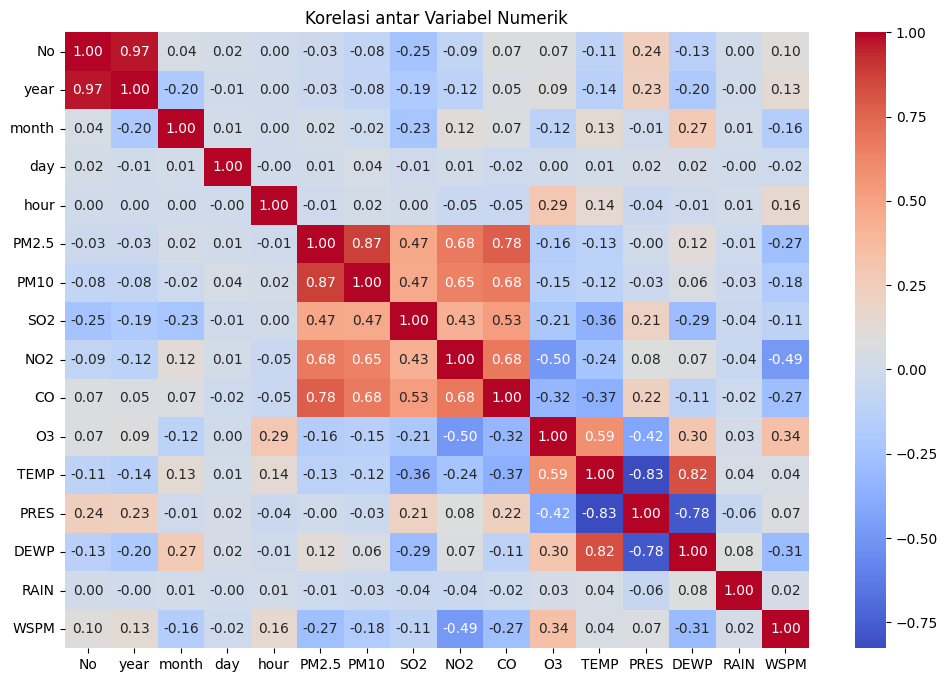

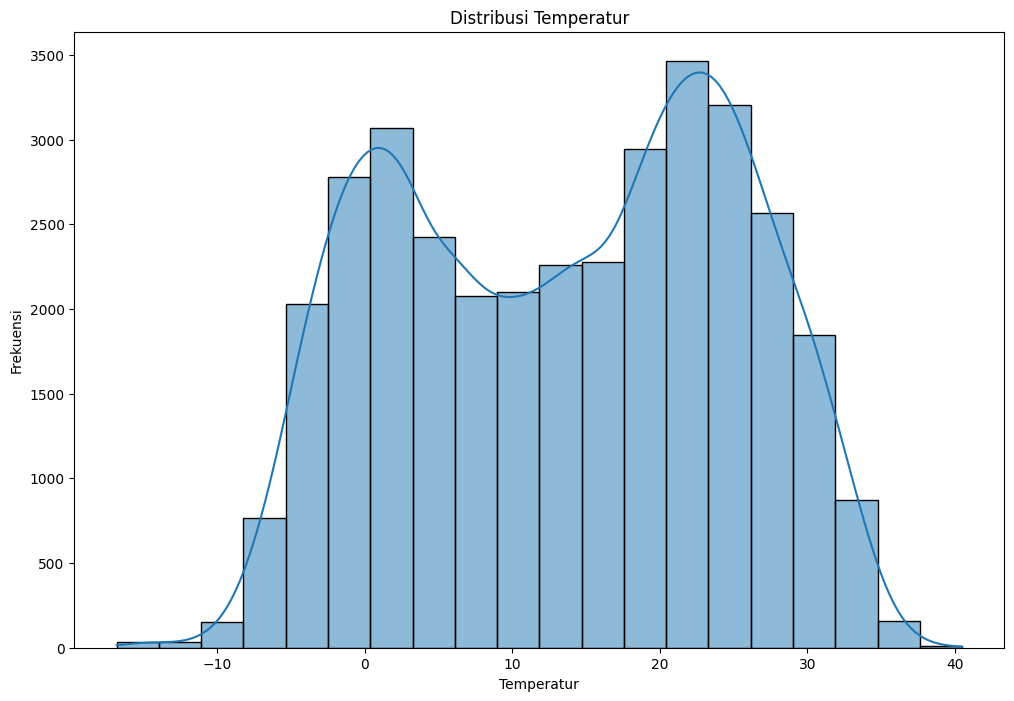

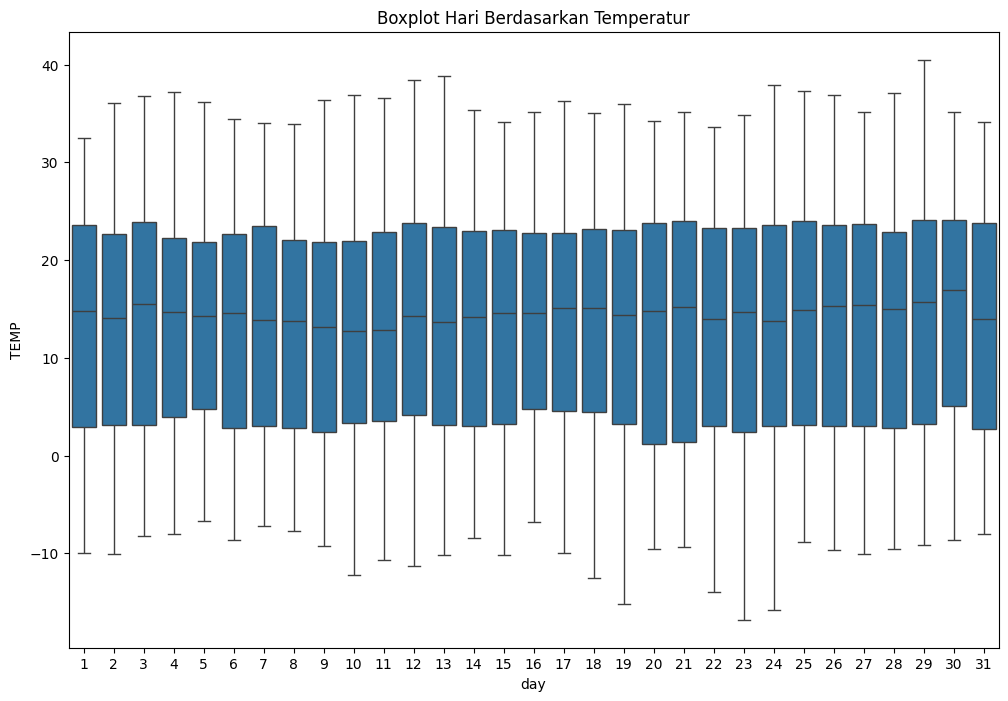

In [9]:
# Korelasi antar variabel numerik
correlation_matrix = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Variabel Numerik')
plt.show()

# Distribusi univariat
plt.figure(figsize=(12, 8))
sns.histplot(data1['TEMP'], kde=True, bins=20)
plt.title('Distribusi Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk melihat distribusi dan outlier
plt.figure(figsize=(12, 8))
sns.boxplot(x='day', y='TEMP', data=data1)
plt.title('Boxplot Hari Berdasarkan Temperatur')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

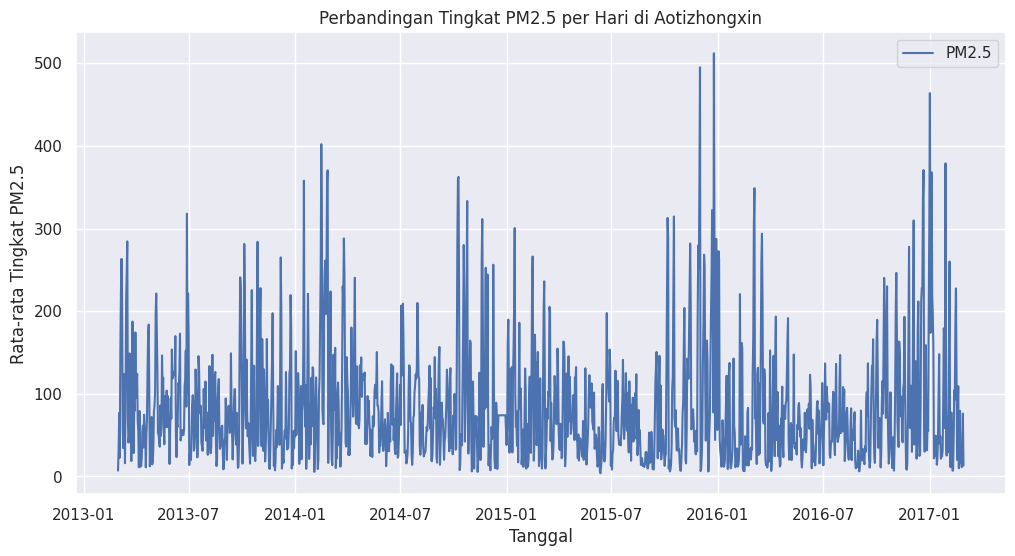

In [10]:
# Konversi kolom tanggal
data1['tanggal'] = pd.to_datetime(data1[['year', 'month', 'day']], format='%Y-%m-%d')
daily_comparison = data1.groupby('tanggal').mean()

# Visualisasi menggunakan line chart
plt.figure(figsize=(12, 6))
sns.set_theme()
plt.plot(daily_comparison.index, daily_comparison['PM2.5'], label='PM2.5')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.title('Perbandingan Tingkat PM2.5 per Hari di Aotizhongxin')
plt.legend()
plt.show()

### Pertanyaan 2:

<ipython-input-11-0125e64a1e6b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_comparison = data1.groupby(data1['tanggal_jam']).mean()


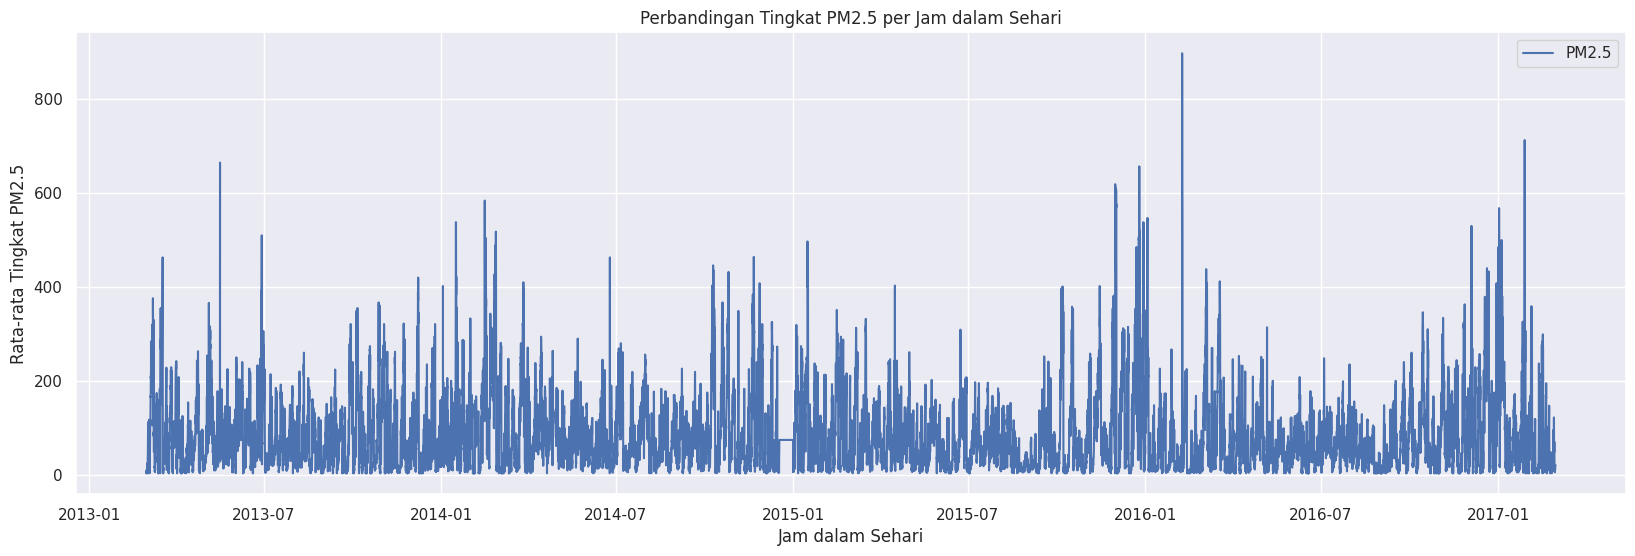

In [11]:
# Konversi kolom tanggal dan jam
data1['tanggal_jam'] = pd.to_datetime(data1[['year', 'month', 'day','hour']], format='%Y-%m-%d %H:%M:%S')

# Perbandingan per jam (atau sesuaikan dengan periode waktu yang diinginkan)
hourly_comparison = data1.groupby(data1['tanggal_jam']).mean()

# Visualisasi per jam
plt.figure(figsize=(20, 6))
# atau
# sns.set_theme()

# Visualisasi menggunakan line chart
plt.plot(hourly_comparison.index, hourly_comparison['PM2.5'], label='PM2.5')


plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.title('Perbandingan Tingkat PM2.5 per Jam dalam Sehari')
plt.legend()
plt.show()

<ipython-input-24-ab440b5b566f>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()


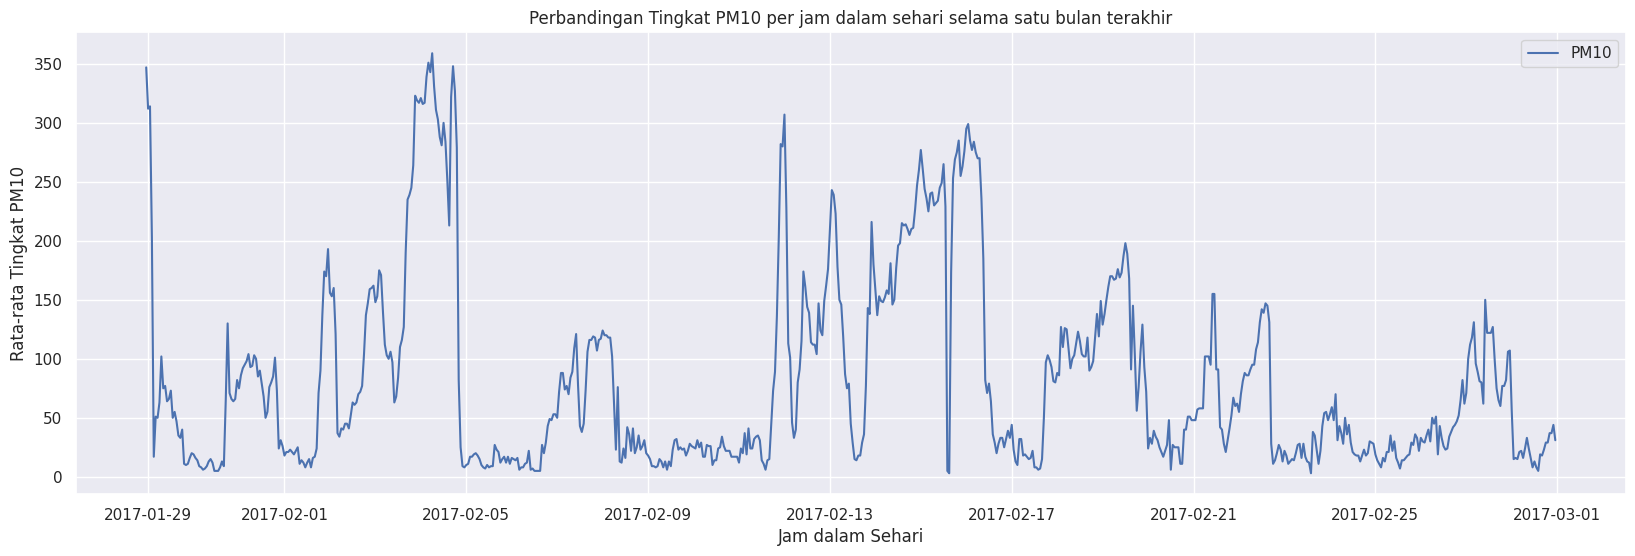

In [24]:
# Filter data hanya untuk 1 bulan kebelakang
end_date = data1['tanggal_jam'].max()
start_date = end_date - pd.DateOffset(month=1)
data_one_year = data1[(data1['tanggal_jam'] >= start_date) & (data1['tanggal_jam'] <= end_date)]

# Perbandingan per jam untuk satu tahun terakhir
hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()

# Visualisasi per jam
plt.figure(figsize=(20, 6))
plt.plot(hourly_comparison_one_year.index, hourly_comparison_one_year['PM10'], label='PM10')

plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Tingkat PM10')
plt.title('Perbandingan Tingkat PM10 per jam dalam sehari selama satu bulan terakhir')
plt.legend()
plt.show()


<ipython-input-25-f25994d953ef>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()


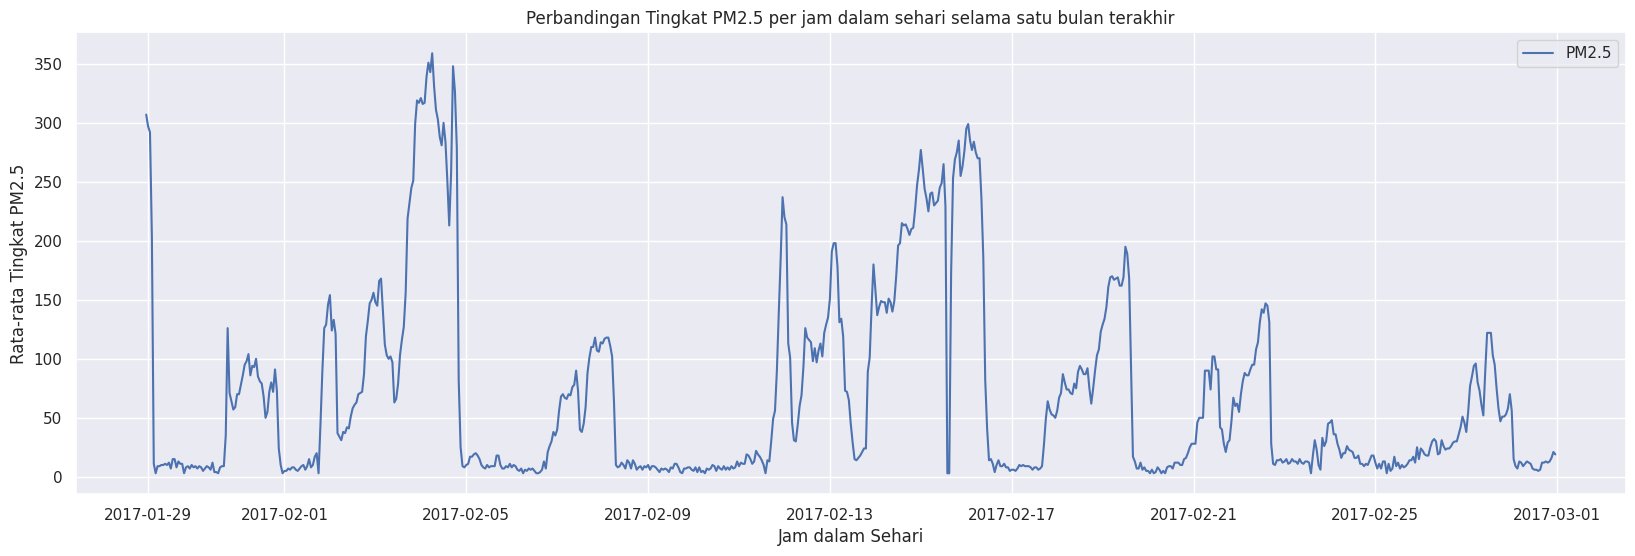

In [25]:
# Perbandingan per jam untuk satu tahun terakhir
hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()

# Visualisasi per jam
plt.figure(figsize=(20, 6))
plt.plot(hourly_comparison_one_year.index, hourly_comparison_one_year['PM2.5'], label='PM2.5')

plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.title('Perbandingan Tingkat PM2.5 per jam dalam sehari selama satu bulan terakhir')
plt.legend()
plt.show()


<ipython-input-26-3828c719c93a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()


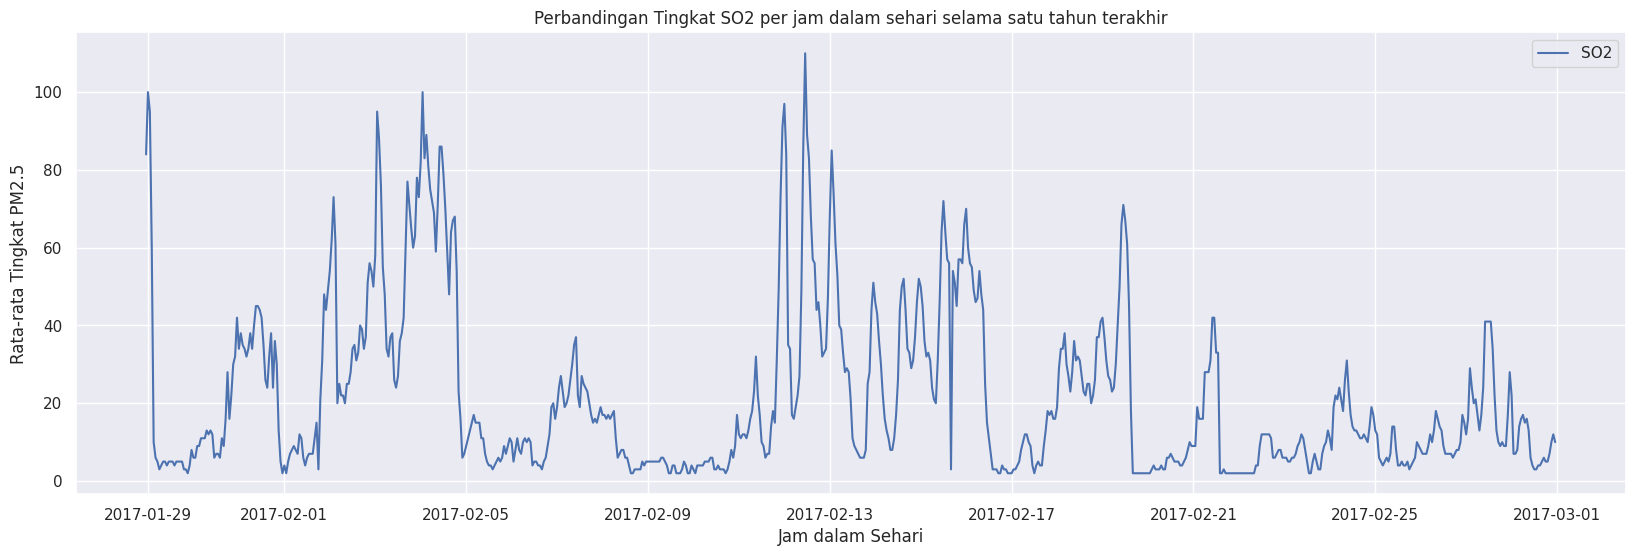

In [26]:
# Perbandingan per jam untuk satu tahun terakhir
hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()

# Visualisasi per jam
plt.figure(figsize=(20, 6))
plt.plot(hourly_comparison_one_year.index, hourly_comparison_one_year['SO2'], label='SO2')

plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.title('Perbandingan Tingkat SO2 per jam dalam sehari selama satu tahun terakhir')
plt.legend()
plt.show()


<ipython-input-27-2b90fbd69dec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()


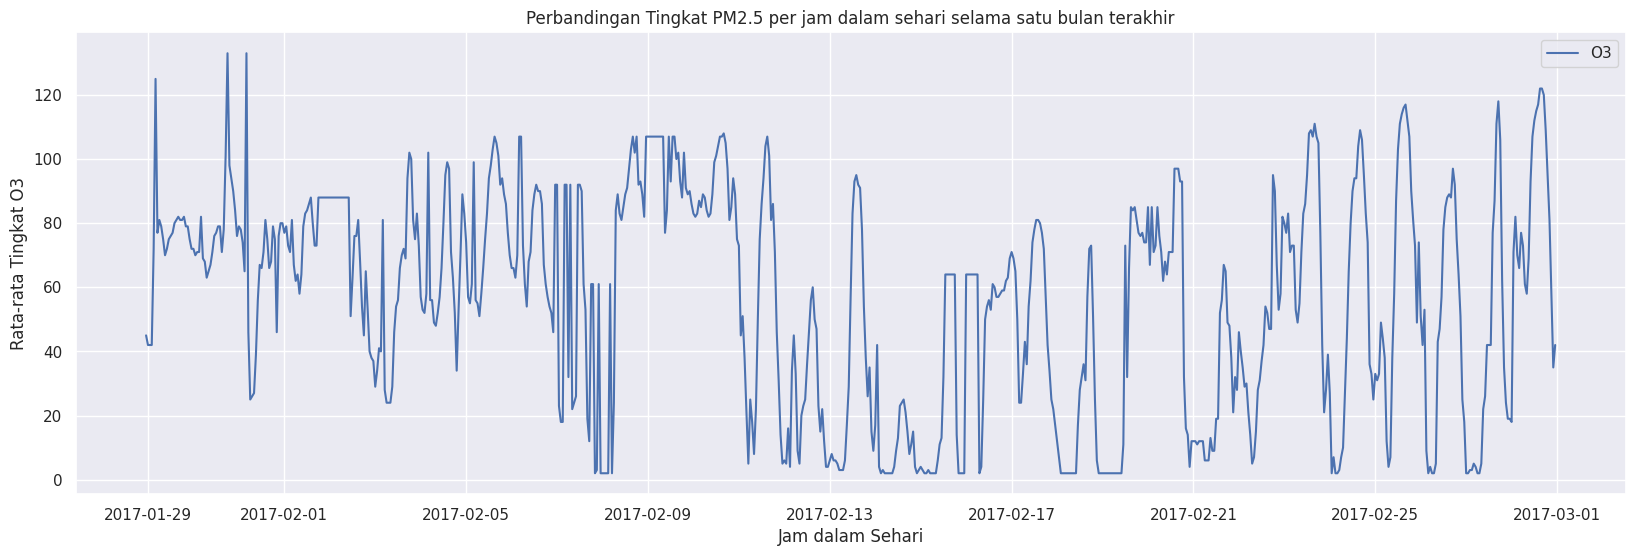

In [27]:
# Perbandingan per jam untuk satu tahun terakhir
hourly_comparison_one_year = data_one_year.groupby(data_one_year['tanggal_jam']).mean()

# Visualisasi per jam
plt.figure(figsize=(20, 6))
plt.plot(hourly_comparison_one_year.index, hourly_comparison_one_year['O3'], label='O3')

plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Tingkat O3')
plt.title('Perbandingan Tingkat PM2.5 per jam dalam sehari selama satu bulan terakhir')
plt.legend()
plt.show()

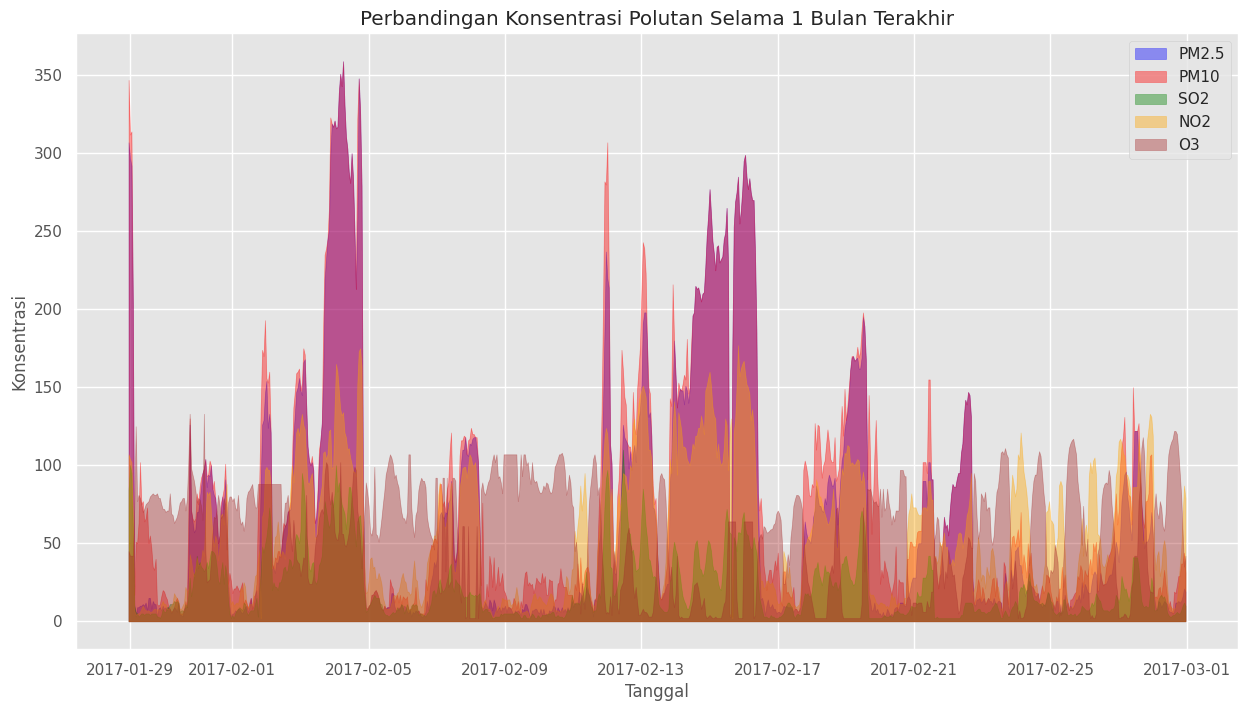

In [31]:
end_date = data1['tanggal_jam'].max()
start_date = end_date - pd.DateOffset(months=1)
data_one_months = data1[(data1['tanggal_jam'] >= start_date) & (data1['tanggal_jam'] <= end_date)]

# Mengatur ukuran dan gaya plot
plt.figure(figsize=(15, 8))
plt.style.use('ggplot')

# Plot grafik area untuk masing-masing konsentrasi polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']
colors = ['blue', 'red', 'green', 'orange', 'brown']

for i, pollutant in enumerate(pollutants):
    plt.fill_between(data_one_months['tanggal_jam'], data_one_months[pollutant], label=pollutant, color=colors[i], alpha=0.4)

plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.title('Perbandingan Konsentrasi Polutan Selama 1 Bulan Terakhir')
plt.legend()
plt.show()

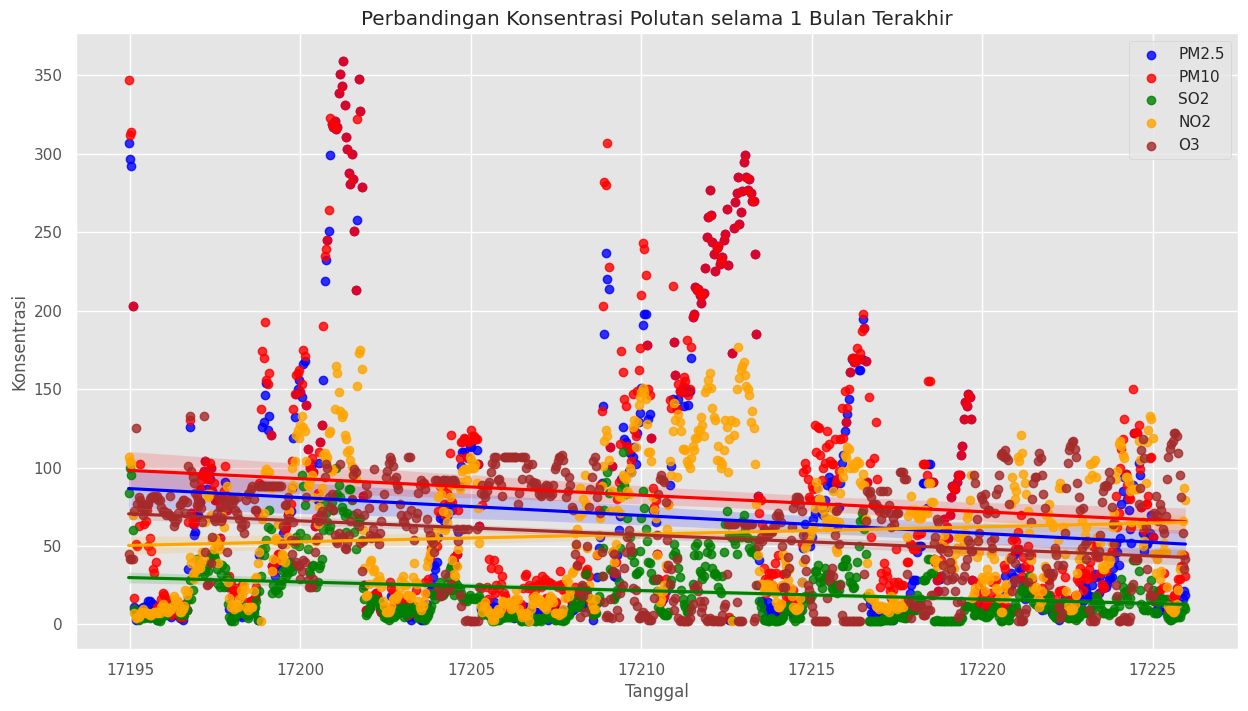

In [32]:
# Mengatur ukuran dan gaya plot
plt.figure(figsize=(15, 8))
# plt.style.use('ggplot')

# Plot grafik scatter dengan garis tren untuk masing-masing konsentrasi polutan
for i, pollutant in enumerate(pollutants):
    # Konversi tanggal ke bentuk yang dapat digunakan sebagai sumbu x
    x_values = mdates.date2num(data_one_month['tanggal_jam'])
    sns.regplot(x=x_values, y=data_one_month[pollutant], scatter_kws={'color': colors[i]}, line_kws={'color': colors[i]}, label=pollutant)

plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.title('Perbandingan Konsentrasi Polutan selama 1 Bulan Terakhir')
plt.legend()
plt.show()

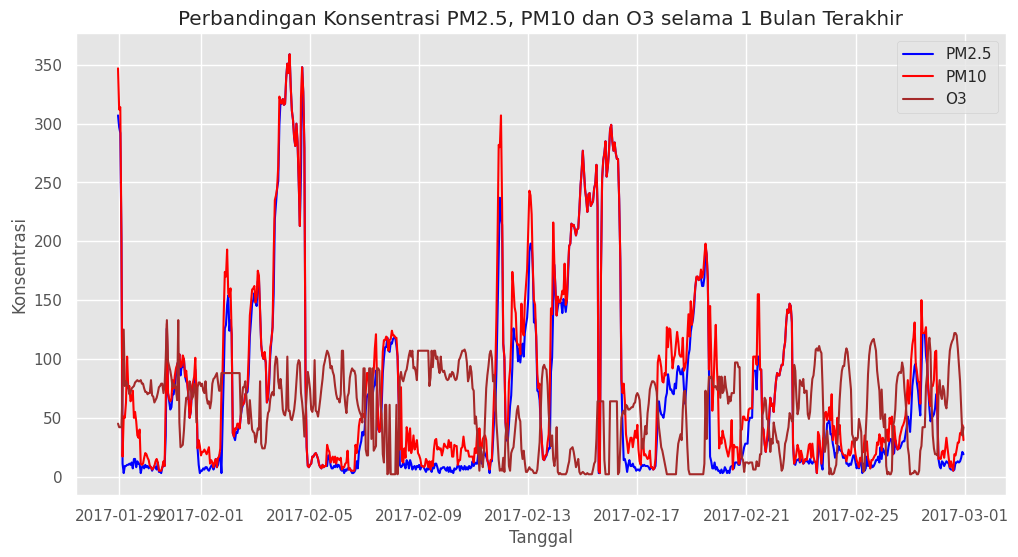

In [33]:
# Misalkan data1 adalah DataFrame Anda dengan kolom tanggal_jam, PM2.5, dan PM10
# Filter data hanya untuk 1 bulan terakhir
end_date = data1['tanggal_jam'].max()
start_date = end_date - pd.DateOffset(months=1)
data_one_month = data1[(data1['tanggal_jam'] >= start_date) & (data1['tanggal_jam'] <= end_date)]

# Mengatur ukuran dan gaya plot
plt.figure(figsize=(12, 6))
# plt.style.use('seaborn-darkgrid')

# Plot grafik untuk PM2.5
plt.plot(data_one_month['tanggal_jam'], data_one_month['PM2.5'], label='PM2.5', color='blue')
# Plot grafik untuk PM10
plt.plot(data_one_month['tanggal_jam'], data_one_month['PM10'], label='PM10', color='red')
plt.plot(data_one_month['tanggal_jam'], data_one_month['O3'], label='O3', color='brown')

plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.title('Perbandingan Konsentrasi PM2.5, PM10 dan O3 selama 1 Bulan Terakhir')
plt.legend()
plt.show()

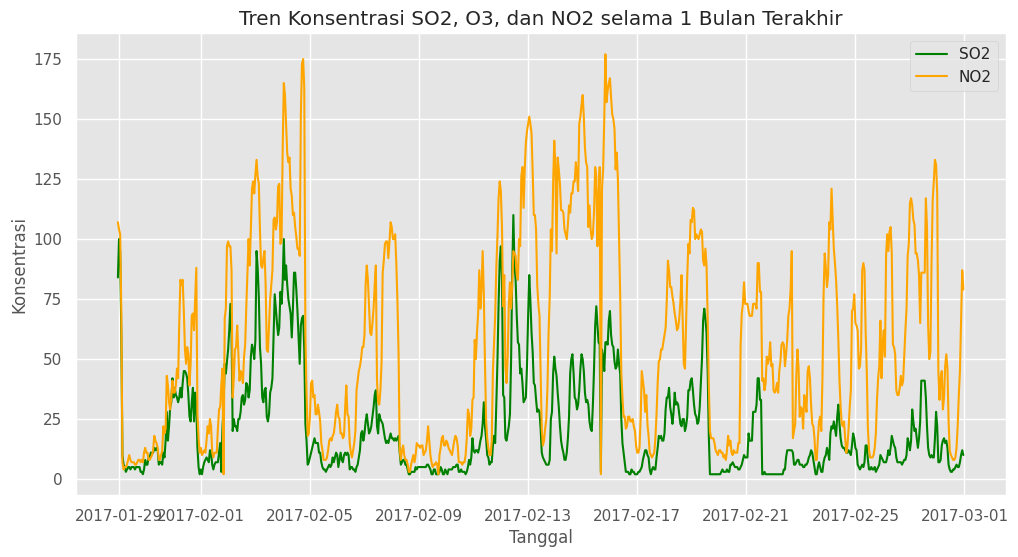

In [34]:
# Mengatur ukuran dan gaya plot
plt.figure(figsize=(12, 6))
# plt.style.use('seaborn-darkgrid')

# Plot grafik untuk SO2
plt.plot(data_one_month['tanggal_jam'], data_one_month['SO2'], label='SO2', color='green')
# Plot grafik untuk O3
# plt.plot(data_one_month['tanggal_jam'], data_one_month['O3'], label='O3', color='orange')
# Plot grafik untuk NO2
plt.plot(data_one_month['tanggal_jam'], data_one_month['NO2'], label='NO2', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.title('Tren Konsentrasi SO2, O3, dan NO2 selama 1 Bulan Terakhir')
plt.legend()
plt.show()

### Pertanyaan 3:

Text(0.5, 1.02, 'Korelasi kandungan CO')

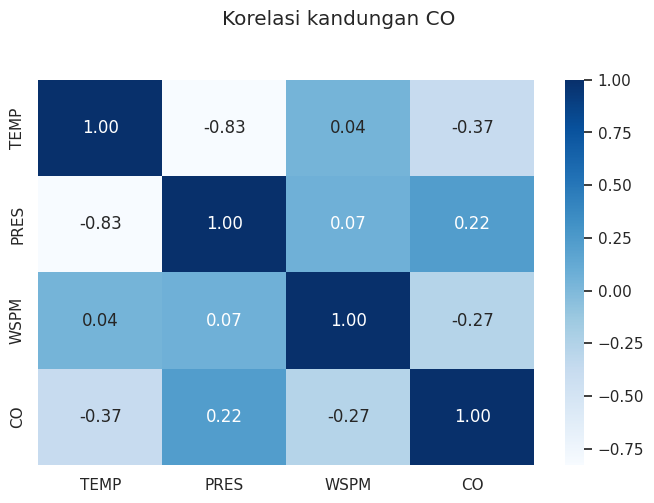

In [13]:
data1.columns

quest3 = data1[['TEMP','PRES','WSPM','CO']]

plt.figure(figsize=(8, 5))
sns.heatmap(quest3.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.suptitle("Korelasi kandungan CO", y=1.02)

In [14]:
data1.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'tanggal',
       'tanggal_jam'],
      dtype='object')

Text(0.5, 1.02, 'Korelasi kandungan SO2')

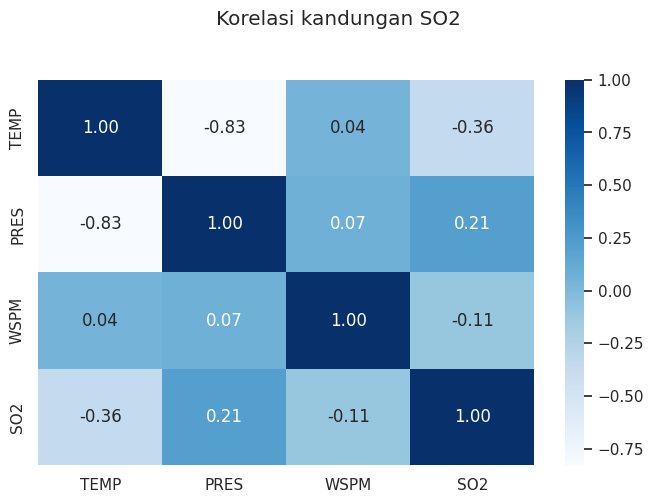

In [16]:
quest4 = data1[['TEMP','PRES','WSPM','SO2']]

plt.figure(figsize=(8, 5))
sns.heatmap(quest4.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.suptitle("Korelasi kandungan SO2", y=1.02)

Text(0.5, 1.02, 'Korelasi kandungan NO2')

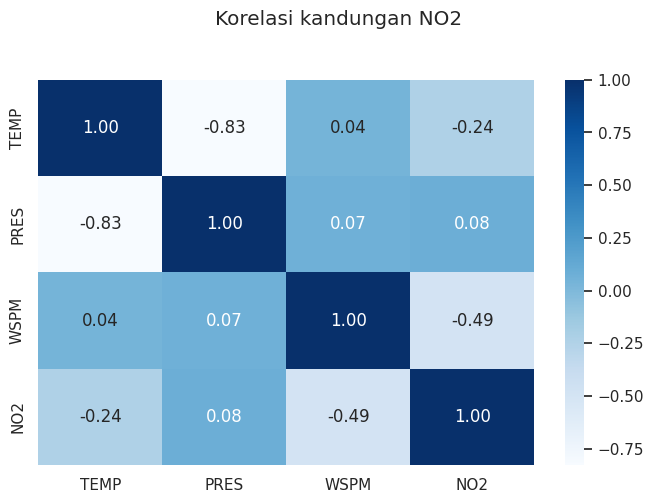

In [17]:
quest5 = data1[['TEMP','PRES','WSPM','NO2']]

plt.figure(figsize=(8, 5))
sns.heatmap(quest5.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.suptitle("Korelasi kandungan NO2", y=1.02)

Text(0.5, 1.02, 'Korelasi kandungan O3')

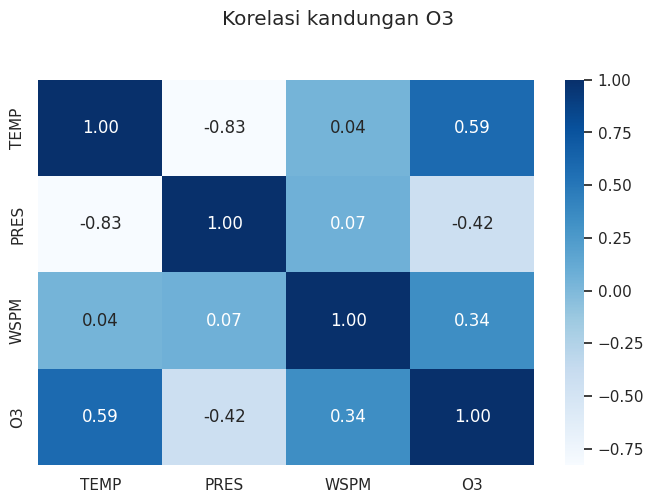

In [18]:
quest6 = data1[['TEMP','PRES','WSPM','O3']]

plt.figure(figsize=(8, 5))
sns.heatmap(quest6.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.suptitle("Korelasi kandungan O3", y=1.02)

### Pertanyaan 4:

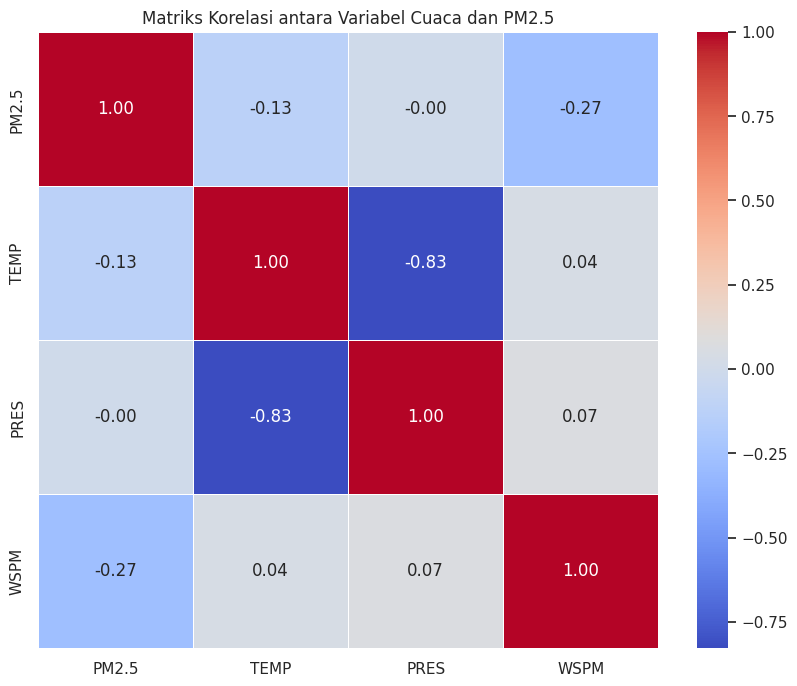

In [19]:
# Analisis korelasi
correlation_matrix = data1[['PM2.5', 'TEMP', 'PRES', 'WSPM']].corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi antara Variabel Cuaca dan PM2.5')
plt.show()

### Pertanyaan 5:

<ipython-input-20-76313baf6e96>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_comparison = data1.groupby('bulan').mean()


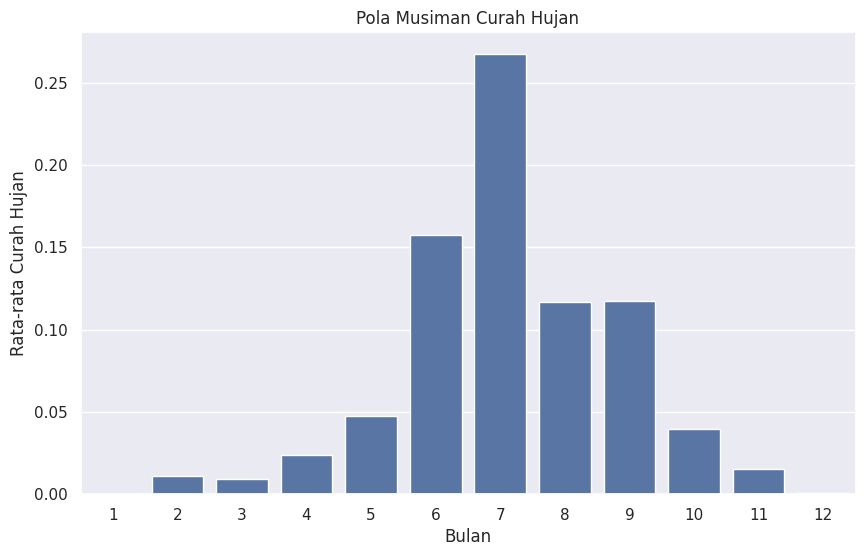

In [20]:
# Perbandingan per bulan (atau sesuaikan dengan periode waktu yang diinginkan)
# Buat kolom 'bulan'
data1['bulan'] = data1['tanggal'].dt.strftime('%Y-%m')
# Perbandingan Per Bulan
monthly_comparison = data1.groupby('bulan').mean()
monthly_comparison
# Ekstrak bulan dari kolom tanggal
data1['bulan'] = data1['tanggal'].dt.month

# Perbandingan rata-rata curah hujan per bulan
monthly_rain_comparison = data1.groupby('bulan')['RAIN'].mean()

# Visualisasi pola musiman curah hujan
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_rain_comparison.index, y=monthly_rain_comparison)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Curah Hujan')
plt.title('Pola Musiman Curah Hujan')
plt.show()

### Pertanyaan 6:

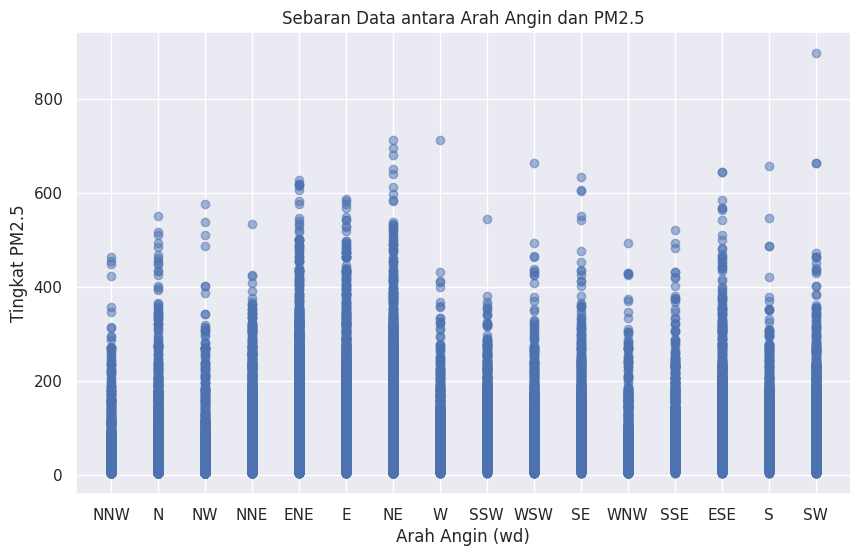

In [21]:
# Konversi arah angin menjadi representasi numerik
wind_directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
data['wind_direction_numeric'] = data['wd'].apply(lambda x: wind_directions.index(x) if x in wind_directions else np.nan)

# Analisis korelasi antara arah angin numerik dan tingkat polusi udara (misalnya, PM2.5)
correlation_wd_numeric_pm25 = data[['wind_direction_numeric', 'PM2.5']].corr()

plt.figure(figsize=(10, 6))
plt.scatter(data['wd'], data['PM2.5'], alpha=0.5)
plt.xlabel('Arah Angin (wd)')
plt.ylabel('Tingkat PM2.5')
plt.title('Sebaran Data antara Arah Angin dan PM2.5')
plt.show()

### Pertanyaan 7:


Mean Squared Error: 5325.699425239814


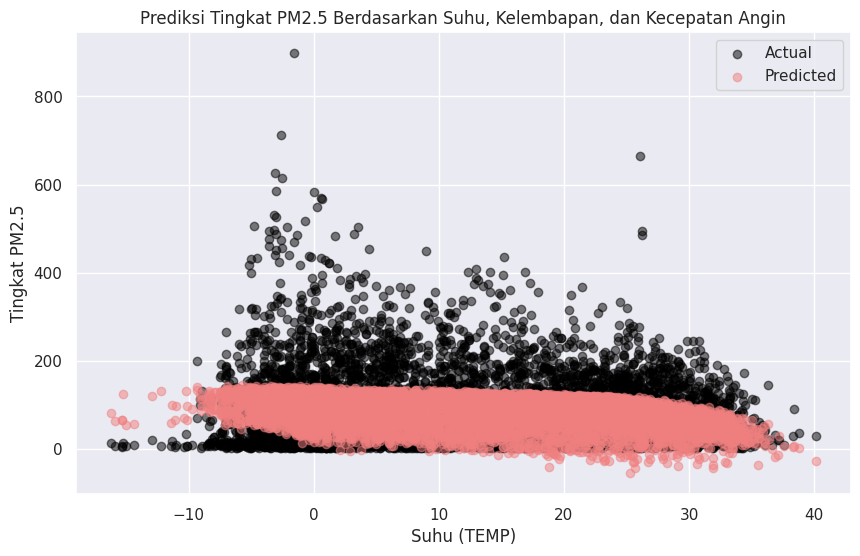

In [22]:
# Pilih variabel cuaca yang akan digunakan untuk prediksi
features = ['TEMP', 'DEWP', 'WSPM']

# Pilih variabel target (misalnya, PM2.5)
target = 'PM2.5'

# Pisahkan data menjadi dataset latihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model pada dataset latihan
model.fit(X_train, y_train)

# Lakukan prediksi pada dataset pengujian
y_pred = model.predict(X_test)

# Hitung Mean Squared Error sebagai metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))

# Plot data aktual
plt.scatter(X_test['TEMP'], y_test, label='Actual', alpha=0.5, color='black')

# Plot data prediksi
plt.scatter(X_test['TEMP'], y_pred, label='Predicted', alpha=0.5, color='lightcoral')
# Atur label

plt.xlabel('Suhu (TEMP)')
plt.ylabel('Tingkat PM2.5')
plt.title('Prediksi Tingkat PM2.5 Berdasarkan Suhu, Kelembapan, dan Kecepatan Angin')
plt.legend()
plt.show()

### Pertanyaan 8:

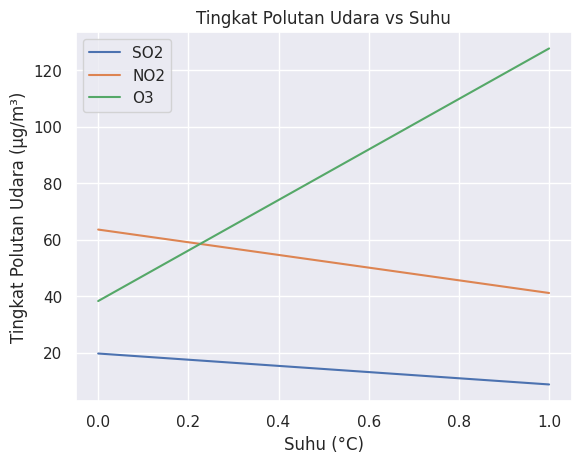

In [23]:
# Filter data berdasarkan suhu
data_rendah = data1[data1['TEMP'] <= 25]
data_tinggi = data1[data1['TEMP'] > 25]

# Hitung rata-rata tingkat SO2, NO2, dan O3
rata_rata_so2_rendah = data_rendah['SO2'].mean()
rata_rata_no2_rendah = data_rendah['NO2'].mean()
rata_rata_o3_rendah = data_rendah['O3'].mean()

rata_rata_so2_tinggi = data_tinggi['SO2'].mean()
rata_rata_no2_tinggi = data_tinggi['NO2'].mean()
rata_rata_o3_tinggi = data_tinggi['O3'].mean()

# Buat grafik
plt.plot([0, 1], [rata_rata_so2_rendah, rata_rata_so2_tinggi], label='SO2')
plt.plot([0, 1], [rata_rata_no2_rendah, rata_rata_no2_tinggi], label='NO2')
plt.plot([0, 1], [rata_rata_o3_rendah, rata_rata_o3_tinggi], label='O3')

# Atur label
plt.xlabel('Suhu (°C)')
plt.ylabel('Tingkat Polutan Udara (μg/m³)')
plt.title('Tingkat Polutan Udara vs Suhu')
plt.legend()

# Tampilkan grafik
plt.show()